# Cow State Machine learning

Cow data collected from accelerometer (x,y,z), the idea is to infer(Educated guess from data) the following states:
* r = run
* s = stop
* w = walk
* m = moo
* i = itch
* e = eat
* f = fight

Some of the states like (moo/eat) will maybe be difficult to classify, but let's check what the data will show ...

### References
* [Pandas Tutorial](https://github.com/jon-fernandes/ztkfp)
* [Seaborn Distributions](https://seaborn.pydata.org/tutorial/distributions.html)
* [Cow Data](https://github.com/ARMmbed/dsa-2017/tree/master/fieldwork-results/cows)
* [PCA Tutorial](https://github.com/pjshort/PCA_datascisummit)
* [Scikit-Learn tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [Normalize data in Pandas](https://stackoverflow.com/questions/12525722/normalize-data-in-pandas)
* [Random Forest Scikit-Learn](http://scikit-learn.org/stable/modules/ensemble.html)
* [Decision trees Scikit-Learn](http://scikit-learn.org/stable/modules/tree.html)
* [Long 3h Video on Scikit-Learn](https://www.youtube.com/watch?v=80fZrVMurPM)
* [PCA Decomposition](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [TSNE on Scikit-Learn](http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html)
* [Non linear Manifold methods on Scikit-Learn](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib import request
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

### Get Cow Data

In [2]:
# Download data
request.urlretrieve(
    "https://github.com/ARMmbed/dsa-2017/raw/master/fieldwork-results/cows/cow_data_xyz_time_resampled.csv", 
    "cow_data_xyz_time_resampled.csv")
request.urlretrieve(
    "https://github.com/ARMmbed/dsa-2017/raw/master/fieldwork-results/cows/tagged_cow_data.csv", 
    "tagged_cow_data.csv")

# Create pandas from csv
cow_data_xyz_time = pd.read_csv('cow_data_xyz_time_resampled.csv', usecols=[1,2,3,4,5])
tagged_cow_data = pd.read_csv('tagged_cow_data.csv')

### Take a look on data

In [3]:
cow_data_xyz_time.head()

,x,y,z,time,time_resampled
0,66,66,-240,2017-07-22T08:07:20.346321,2017-07-22T08:07:20.346321
1,32,248,-222,2017-07-22T08:07:20.346321,2017-07-22T08:07:20.385711
2,66,-182,-244,2017-07-22T08:07:20.346321,2017-07-22T08:07:20.425101
3,56,58,-250,2017-07-22T08:07:20.346321,2017-07-22T08:07:20.464491
4,58,62,-248,2017-07-22T08:07:20.346321,2017-07-22T08:07:20.503881


In [4]:
tagged_cow_data.head()

,hour,minute,second,Activity
0,11,11,37,r
1,11,11,43,s
2,11,11,52,w
3,11,11,56,s
4,11,12,1,w


### Check unique states on label data

In [5]:
tagged_cow_data.Activity.unique()

array(['r', 's', 'w', 'm', 'i', 'e', 'f'], dtype=object)

### Pair plot with x,y,z

In [22]:
print('X mean:',cow_data_xyz_time.x.mean(), ' Variance:', cow_data_xyz_time.x.var())
print('Y mean:',cow_data_xyz_time.y.mean(), ' Variance:', cow_data_xyz_time.y.var())
print('Z mean:',cow_data_xyz_time.z.mean(), ' Variance:', cow_data_xyz_time.z.var())

X mean: -47.48785450526263  Variance: 12567.718206834163
Y mean: -38.177598030596094  Variance: 16021.807184031297
Z mean: 178.37207666608055  Variance: 38368.05608924154


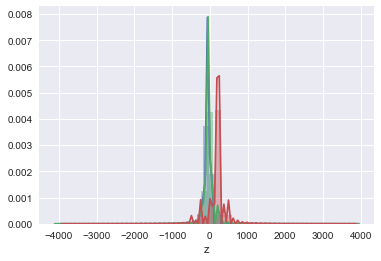

In [26]:
sns.distplot(cow_data_xyz_time.x)
sns.distplot(cow_data_xyz_time.y)
sns.distplot(cow_data_xyz_time.z)

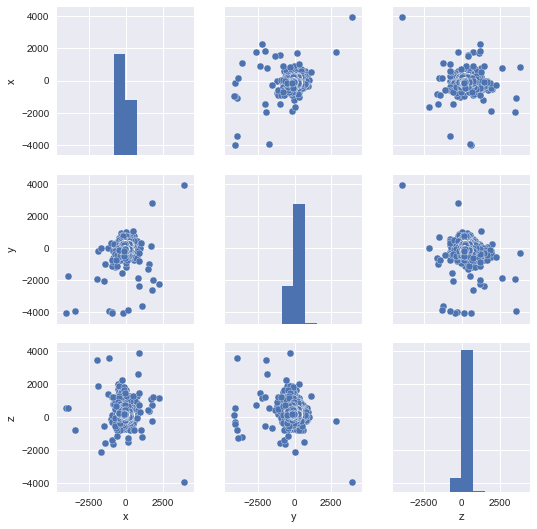

In [6]:
plot = sns.pairplot(cow_data_xyz_time[cow_data_xyz_time.columns[0:3]])

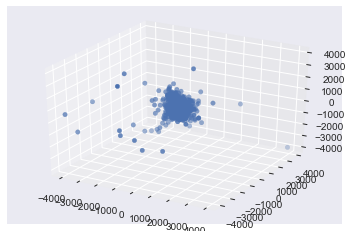

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cow_data_xyz_time[cow_data_xyz_time.columns[0]], 
        cow_data_xyz_time[cow_data_xyz_time.columns[1]], 
        cow_data_xyz_time[cow_data_xyz_time.columns[2]], label='Cows')

### Normalize data

In [8]:
normalized_data = cow_data_xyz_time[cow_data_xyz_time.columns[0:3]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

### First try PCA

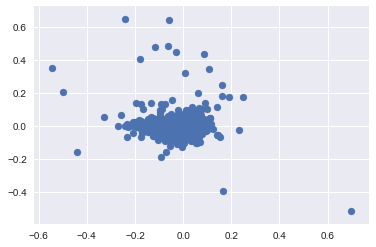

In [9]:
pca = PCA(n_components=2, svd_solver='auto',
          whiten=False).fit(normalized_data)
X_pca = pca.transform(normalized_data)
plt.scatter(X_pca[:, 0],X_pca[:, 1])

### Try Tsne

In [ ]:
X_tsne = TSNE(n_components=2, perplexity=50, verbose=2).fit_transform(normalized_data)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 39809
[t-SNE] Computed conditional probabilities for sample 2000 / 39809
[t-SNE] Computed conditional probabilities for sample 3000 / 39809
[t-SNE] Computed conditional probabilities for sample 4000 / 39809
[t-SNE] Computed conditional probabilities for sample 5000 / 39809
[t-SNE] Computed conditional probabilities for sample 6000 / 39809
[t-SNE] Computed conditional probabilities for sample 7000 / 39809
[t-SNE] Computed conditional probabilities for sample 8000 / 39809
[t-SNE] Computed conditional probabilities for sample 9000 / 39809
[t-SNE] Computed conditional probabilities for sample 10000 / 39809
[t-SNE] Computed conditional probabilities for sample 11000 / 39809
[t-SNE] Computed conditional probabilities for sample 12000 / 39809
[t-SNE] Computed conditional probabilities for sample 13000 / 39809
[t-SNE] Computed conditional probabilities

In [ ]:
plt.scatter(X_tsne[:, 0],X_tsne[:, 1])

In [12]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)